# EXAMEN

Instrucciones Generales para el Examen:
* Utiliza en todos los pasos aleatorios random_state=5, para que pueda reproducir exactamente los datos a la hora de corregir los ejercicios. 
* Documenta todos los pasos de tu análisis y las decisiones que tomas.
* Se evaluará la precisión del modelo, la comprensión de los conceptos de Machine Learning, la calidad del código y la calidad de las explicaciones.

## EJERCICIO 1

Carga el conjunto de datos Iris desde scikit-learn.

Explora los datos visualmente utilizando gráficos: representa la distribución de cada variable (todas las de X e y), diagramas de cajas de cada variable (todas las de X) y la matriz de correlaciones para entender las relaciones entre las características. ¿Qué puedes deducir?

Divide el conjunto de datos en entrenamiento y prueba, estratificando por el tipo de flor.

Prepara los datos mediante una pipeline.

Entrena y evalúa un clasificador de Random Forest (añade Random Forest al pipeline) y utiliza validación cruzada. ¿Qué medición has usado para evaluar el modelo y por qué? ¿Cuál es el mejor y el peor error que consigues?

Optimiza el número de árboles, ¿cuál es el mejor valor?

Evalúa el rendimiento del modelo optimizado en el conjunto de prueba.

Guarda el modelo en un fichero y cárgalo desde un fichero .py que pida 4 datos para una nueva flor (anchura del pétalo, longitud del pétalo, anchura del sépalo y longitud del sépalo) y prediga de que clase es la flor.

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 'target': 0      0
1      0
2 

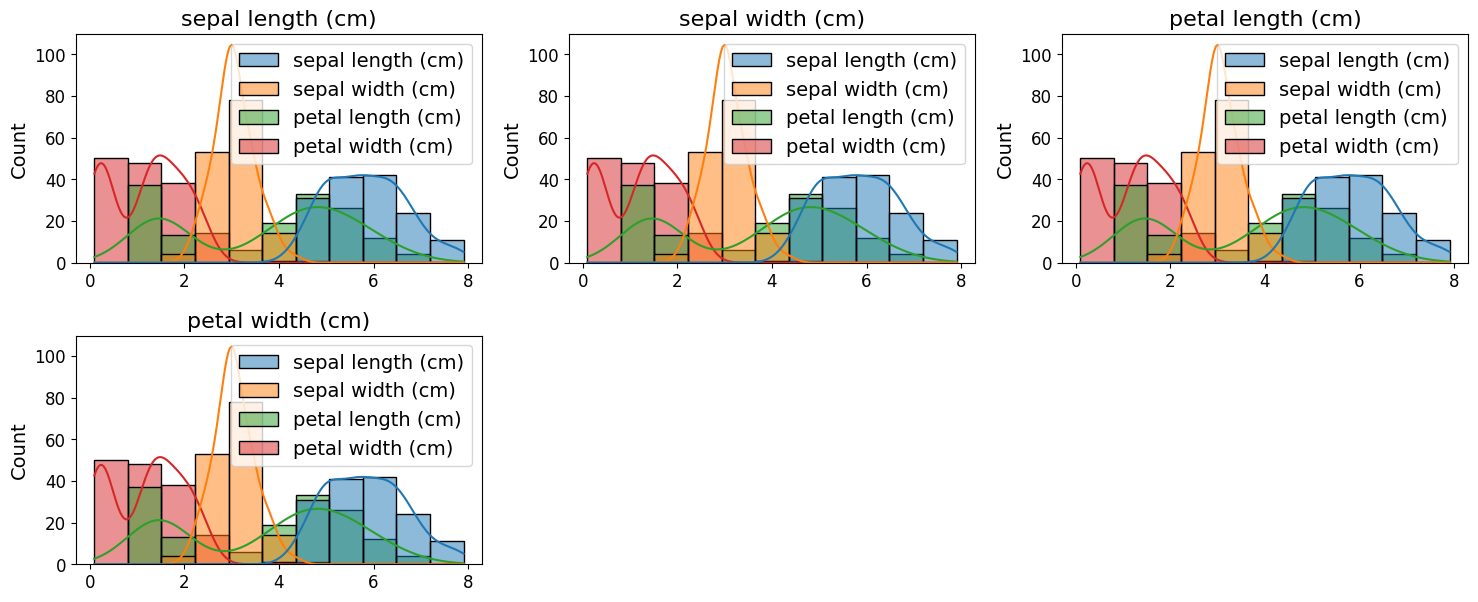

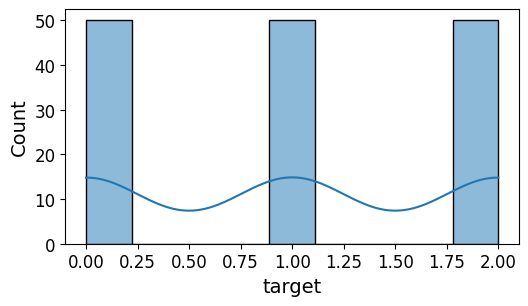

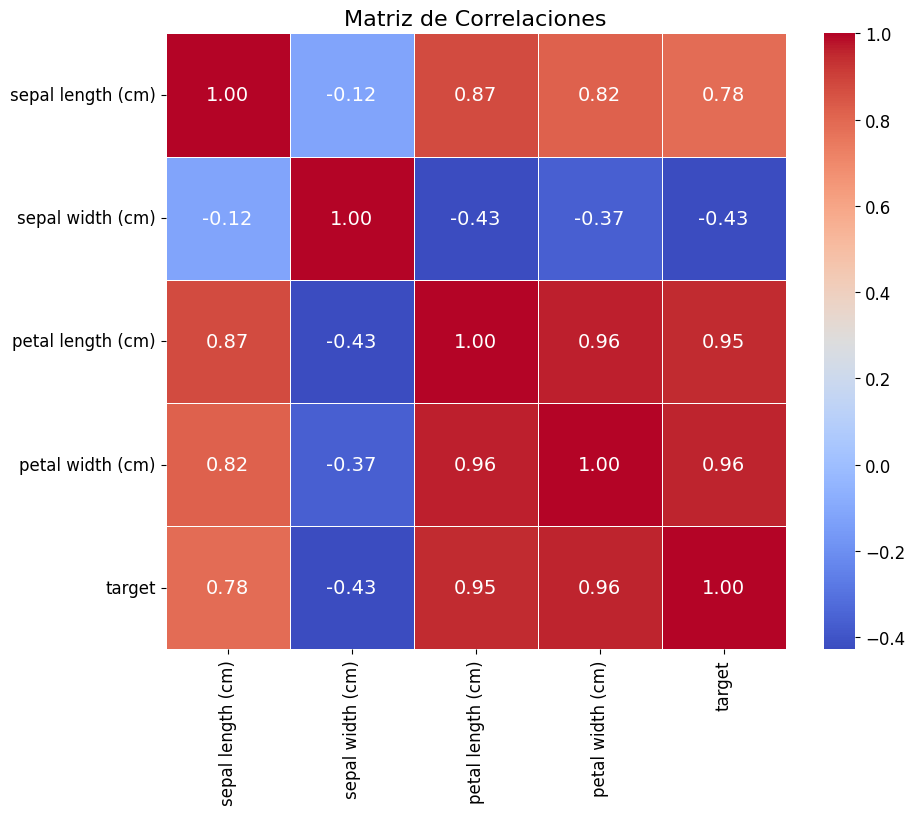

Accuracy - Voting Classifier: 0.9444444444444444
Accuracy en el conjunto de prueba: 0.9


c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 4 features, but RandomForestClassifier is expecting 3 features as input.

In [56]:
import numpy as np
import joblib
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargando datos
iris = datasets.load_iris(as_frame=True)

#setosa_or_versicolor = (y == 0) | (y == 1)
X = iris.data
y = iris.target

print(iris)


# Grafico X
feature_names = iris.feature_names
plt.figure(figsize=(15, 12))
for i, feature in enumerate(feature_names):
    plt.subplot(4, 3, i + 1)
    sns.histplot(X, kde=True)
    plt.title(feature)
    plt.tight_layout()
plt.show()


# Grafico y

plt.figure(figsize=(15, 12))
plt.subplot(4, 3, i + 1)  
sns.histplot(y, kde=True)
plt.tight_layout()
plt.show()


df = pd.concat([X, y], axis=1)
# Calcular la matriz de correlaciones
correlation_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()

#Separando datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.15, random_state = 5)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=5)

#Pipeline
lin_modelo = make_pipeline(StandardScaler(), LinearSVC(C=5, random_state=5))
svc_modelo = make_pipeline(StandardScaler(), SVC(kernel="linear", C=5))
sgd_modelo = make_pipeline(StandardScaler(), SGDClassifier(alpha=0.05, random_state=5))

lin_modelo.fit(X_train, y_train)
svc_modelo.fit(X_train, y_train)
sgd_modelo.fit(X_train, y_train)


# Inicializar clasificadores individuales
tree_clf = DecisionTreeClassifier(random_state=5)
logistic_clf = LogisticRegression(random_state=5, max_iter=1000, solver='saga')
svm_clf = SVC(probability=True, random_state=5, max_iter=1000)  # Puedes ajustar el valor de max_iter según sea necesario

# Escalar los datos para la regresión logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Entrenar clasificadores individuales
tree_clf.fit(X_train, y_train)
logistic_clf.fit(X_train_scaled, y_train)
svm_clf.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de validación
tree_pred = tree_clf.predict(X_val)
logistic_pred = logistic_clf.predict(X_val_scaled)
svm_pred = svm_clf.predict(X_val_scaled)

# Crear el conjunto de entrenamiento para el clasificador blender
blender_train_set = np.column_stack([tree_pred, logistic_pred, svm_pred])

# Entrenar el clasificador blender (RandomForestClassifier)
blender = RandomForestClassifier(random_state=5)
blender.fit(blender_train_set, y_val)

# Crear un ensamble con hard voting
voting_clf = VotingClassifier(estimators=[
    ('tree', tree_clf),
    ('logistic', logistic_clf),
    ('svm', svm_clf)
], voting='hard')

# Entrenar el ensamble
voting_clf.fit(X_train, y_train)

# Evaluar rendimiento en el conjunto de validación
voting_pred = voting_clf.predict(X_val)
print("Accuracy - Voting Classifier:", accuracy_score(y_val, voting_pred))

# Evaluar rendimiento en el conjunto de prueba
test_pred = voting_clf.predict(X_test)
print("Accuracy en el conjunto de prueba:", accuracy_score(y_test, test_pred))

# Hacer predicciones en el conjunto de prueba
test_predictions = np.column_stack([clf.predict(X_test) for clf in [tree_clf, logistic_clf, svm_clf]])
blender_test_set = np.column_stack([test_pred, test_predictions])

# Evaluar el rendimiento del ensamble de stacking en el conjunto de prueba
stacking_test_pred = blender.predict(blender_test_set)
print("Accuracy - Stacking Ensemble:", accuracy_score(y_test, stacking_test_pred))

# Utilizar StackingClassifier
stacking_clf = StackingClassifier(
    classifiers=[tree_clf, logistic_clf, svm_clf],
    meta_classifier=RandomForestClassifier(random_state=5)
)

# Entrenar el ensamble de stacking
stacking_clf.fit(X_train, y_train)

# Evaluar el rendimiento en el conjunto de prueba
stacking_test_pred = stacking_clf.predict(X_test)
print("Accuracy - StackingClassifier:", accuracy_score(y_test, stacking_test_pred))

# Definir el modelo Ridge
ridge_model = Ridge()

# Definir los valores del parámetro alpha a probar
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Configurar la búsqueda exhaustiva
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)


# Obtener el mejor modelo de la búsqueda exhaustiva
best_ridge_model = grid_search.best_estimator_

# Guardar el mejor modelo en un archivo
mejor_modelo = 'best_model.joblib'
joblib.dump(best_ridge_model, mejor_modelo)


## EJERCICIO 2

En este ejercicio, trabajarás con un conjunto de datos de pruebas creados (ejercicio2.csv). 

Tu objetivo es construir un modelo de regresión que pueda predecir con precisión la variable dependiente y a partir de las variables independientes x1 y x2. 

Deberás:
* Cargar los datos
* Visualizar gráficamente los datos (x1 respecto a y e x2 respecto a y)
* Dividir los datos en conjunto de entrenamiento y pruebas
* Probar diferentes modelos de regresión polinómica, hasta ver cuál es el mejor degree (y explicarlo gráficamente y por medida del error en los conjuntos de entrenamiento y pruebas), no hace falta que uses validación cruzada. ¿Qué medición has usado para evaluar el modelo y por qué? ¿cuál es el mejor degree?
* Probar ahora con Elastic Net, optimizando los hiperparámetros con búsqueda exhaustiva, ¿ha mejorado con esta regularización? ¿cuáles son los mejores datos para los hiperparámetros?

         x1        x2          y
0  0.488135  3.115185 -91.197936
1  2.151894 -0.239160 -44.928270
2  1.027634  0.231560  -5.347793
3  0.448832 -2.494794  78.026649
4 -0.763452  1.050430   2.176875


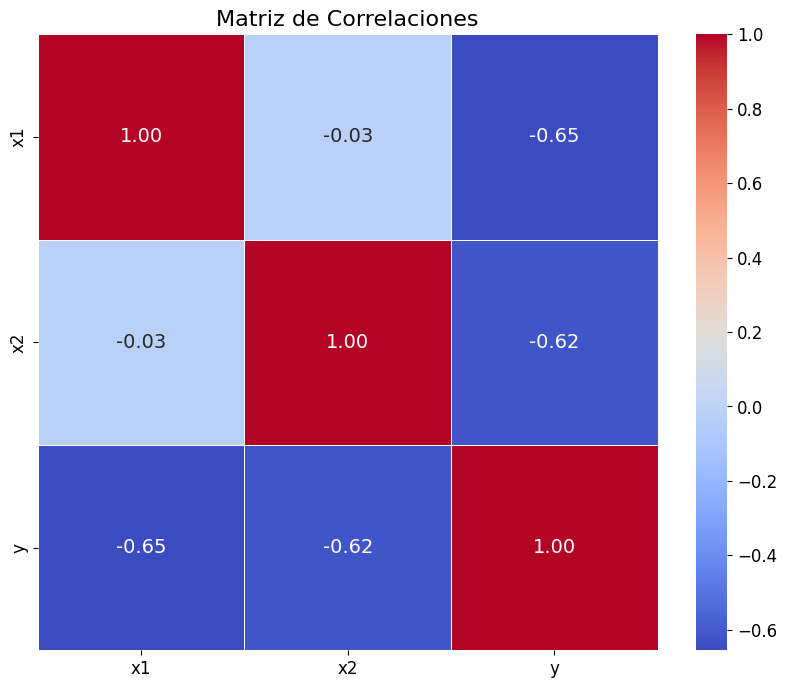

TypeError: cannot concatenate object of type '<class 'pandas.core.indexes.base.Index'>'; only Series and DataFrame objs are valid

In [54]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge


# Cargar los datos
ejercicio2 = pd.read_csv("ejercicio2.csv",encoding="UTF-8", sep=",")
print(ejercicio2.head())

X, y = ejercicio2.columns[0:2], ejercicio2.shape[0]

# Calcular la matriz de correlaciones
correlation_matrix = ejercicio2.corr()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()

# GRAFICOS
# Concatenar las características y la variable objetivo en un solo DataFrame
df = pd.concat([X, y], axis=1)

# Visualizar histogramas de cada característica
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogramas de Características y Variable Objetivo", y=1.02)
plt.show()

# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Probar con diferentes Modelos de Regresión
models = {
    "Regresión Lineal": LinearRegression(),
    "Regresión Ridge": Ridge(),
    "Regresión Lasso": Lasso()
}

# Validación cruzada con RMSE
kf = KFold(n_splits=5, shuffle=True, random_state=5)
scorer = make_scorer(mean_squared_error, squared=False)

# Resultados de los diferentes Modelos de Regresión
for model_name, model in models.items():
    rmse_scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)
    print(f"{model_name} - RMSE: {np.mean(rmse_scores)} +/- {np.std(rmse_scores)}")

# Calcular el máximo y mínimo de y
y_max = y.max()
y_min = y.min()

print(f"Máximo de y: {y_max}")
print(f"Mínimo de y: {y_min}")

# Dibujar el histograma de y
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=20, kde=True)
plt.title("Histograma de la Variable Objetivo (y)")
plt.xlabel("Valor de y")
plt.ylabel("Frecuencia")
plt.show()

# Optimizar Parámetros
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Definir el modelo Ridge
ridge_model = Ridge()

# Definir los valores del parámetro alpha a probar
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Configurar la búsqueda exhaustiva
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Realizar la búsqueda exhaustiva en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (RMSE):", np.sqrt(-grid_search.best_score_))

# Evaluar el modelo optimizado en el conjunto de prueba
y_pred = grid_search.best_estimator_.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en conjunto de prueba: {rmse_test}")

# Obtener el mejor modelo de la búsqueda exhaustiva
best_ridge_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de entrenamiento
y_train_pred = best_ridge_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"RMSE en conjunto de entrenamiento: {rmse_train}")

# Evaluar el mejor modelo en el conjunto de prueba
y_test_pred = best_ridge_model.predict(X_test)

# Calcular el coeficiente de determinación (R^2) en el conjunto de prueba
r2_test = best_ridge_model.score(X_test, y_test)

print(f"Coeficiente de Determinación (R^2) en conjunto de prueba: {r2_test}")

## EJERCICIO 3

Carga el conjunto de datos winequality.csv, intentamos predecir la calidad del vino (quality) a partir del resto de características, explora los datos y divide el conjunto de datos en entrenamiento y pruebas (10% para las pruebas).

Crea un pipeline para preparar los datos y aplicar un algoritmo de máquinas de vector soporte, entrena el modelo (guarda el tiempo que tardas en entrenar el modelo) y evalúa el modelo en el conjunto de pruebas (no hace falta que pruebes con diferentes hiperparámetros...)

Crea un pipeline para preparar los datos y aplicar PCA que explique al menos el 95% de la varianza, aplica esta pipeline al conjunto de entrenamiento y al conjunto de pruebas.

Muestra cuantas dimensiones tenías al principio y cuantas después de aplicar PCA.

Aplica a los datos obtenido de aplicar PCA el algoritmo de máquinas de vector soporte, entrena el modelo (guarda el tiempo que tardas en entrenar el modelo) y evalúa el modelo en el conjunto de pruebas (no hace falta que pruebes con diferentes hiperparámetros...)

Compara el error y el tiempo empleado en los dos modelos (sin pca y con pca) e interpreta el resultado.


In [53]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal, uniform
from sklearn.metrics import accuracy_score

# Cargar los datos
ejercicio3 = pd.read_csv("winequality.csv",encoding="UTF-8", sep=";")
X, y = ejercicio3.columns[0:11], ejercicio3.shape[0]
print(ejercicio3.head())

# Obtener una descripción de los datos
print("Descripción del conjunto de datos:")
print(ejercicio3.describe)


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("\nDimensiones del conjunto de prueba:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Entrena el modelo
# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo LinearSVC con dual=False para evitar el FutureWarning
linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = linear_svc.predict(X_test_scaled)

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

# SVC (optimiza los parametros con busqueda aleatoria) para una exactitud mejor
# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los parámetros a ajustar
param_dist = {
    'C': reciprocal(0.001, 1000),
    'gamma': uniform(0.001, 1)
}

# Crear un modelo SVC
svc = SVC(kernel='linear')  # Aquí he utilizado un kernel lineal, puedes ajustar según necesidades

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria en el conjunto de entrenamiento
random_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo y realizar predicciones en el conjunto de prueba
best_svc = random_search.best_estimator_
y_pred_svc = best_svc.predict(X_test_scaled)

# Calcular y mostrar la exactitud del modelo
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Exactitud del modelo SVC optimizado: {accuracy_svc:.2f}')

# Mostrar los mejores parámetros encontrados durante la búsqueda aleatoria
print("\nMejores parámetros encontrados:")
print(random_search.best_params_)

# Evaluar el conjunto de prueba
# Realizar predicciones en el conjunto de prueba con el modelo SVC optimizado
y_pred_svc = best_svc.predict(X_test_scaled)

# Calcular y mostrar la exactitud del modelo en el conjunto de prueba
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Exactitud del modelo SVC optimizado en el conjunto de prueba: {accuracy_svc:.2f}')


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

TypeError: Singleton array array(1599) cannot be considered a valid collection.

## EJERCICIO 4

Una empresa de coches ha sacado un nuevo modelo al mercado. Le ha preguntado a una red social quién ha comprado el producto, recaudando el sexo, la edad y el salario de cada uno de ellos. Ahora queremos construir un modelo que nos permita determinar con estos atributos si la persona comprará el producto o no, para tomar medidas en función de la respuesta para que lo acabe comprando.

Los datos están en el csv

### RECOPILACIÓN Y RECOLECCIÓN DE LOS DATOS

####  OBTENER LOS DATOS

In [57]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal, uniform
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
ejercicio4 = pd.read_csv("compras.csv",encoding="UTF-8", sep=";")
X, y = ejercicio4.columns[0:4], ejercicio4.shape[0]

print(ejercicio4.head(5))






  Identificador,Sexo,Edad,Salario,Compra
0             15624510,Hombre,19,19000,0
1             15810944,Hombre,35,20000,0
2              15668575,Mujer,26,43000,0
3              15603246,Mujer,27,57000,0
4             15804002,Hombre,19,76000,0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Identificador,Sexo,Edad,Salario,Compra  400 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


#### EXPLORAR LOS DATOS 
Con exhaustividad: datos estadísticos, gráficos, correlaciones... e indicar las deduciones a las que llegas

Descripción del conjunto de datos:
<bound method NDFrame.describe of     Identificador,Sexo,Edad,Salario,Compra
0               15624510,Hombre,19,19000,0
1               15810944,Hombre,35,20000,0
2                15668575,Mujer,26,43000,0
3                15603246,Mujer,27,57000,0
4               15804002,Hombre,19,76000,0
..                                     ...
395              15691863,Mujer,46,41000,1
396             15706071,Hombre,51,23000,1
397              15654296,Mujer,50,20000,1
398             15755018,Hombre,36,33000,0
399              15594041,Mujer,49,36000,1

[400 rows x 1 columns]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Identificador,Sexo,Edad,Salario,Compra  400 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


ValueError: Could not interpret value `Sexo` for `x`. An entry with this name does not appear in `data`.

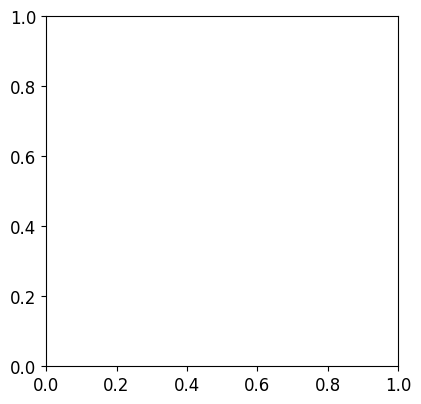

In [58]:
# Obtener una descripción de los datos
print("Descripción del conjunto de datos:")
print(ejercicio4.describe)
ejercicio4.info()

# Gráficos

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=16)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.figure(figsize=(10,10))

# plot 1 (primera fila primera columna)
plt.subplot(2, 2, 1)
sns.countplot(data=ejercicio4, x='Sexo')
plt.title("SEXO")
plt.xlabel("sexo")
plt.ylabel("Frecuencia")

# plot 2 (primera fila segunda columna)
plt.subplot(2, 2, 2)
sns.histplot(data=ejercicio4, x='Edad')
plt.title("EDAD")
plt.xlabel("edad")
plt.ylabel("Frecuencia")

# plot 3 (segunda fila tercera columna)
plt.subplot(2, 2, 3)
sns.histplot(data=ejercicio4, x='Salario')
plt.title("SALARIO")
plt.xlabel("salario")
plt.ylabel("Frecuencia")

# plot 4 (segunda fila cuarta columna)
plt.subplot(2, 2, 4)
sns.histplot(data=ejercicio4, x='Compra')
plt.title("COMPRA")
plt.xlabel("compra")
plt.ylabel("Frecuencia")


plt.tight_layout()
plt.show()


# Calcular la matriz de correlaciones
correlation_matrix = ejercicio4.corr(numeric_only=True)

correlation_matrix.style.background_gradient()

# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()



#### DIVIDIR LOS DATOS EN CONJUNTO DE ENTRENAMIENTO Y PRUEBAS

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

#### PREPARAR LOS DATOS
Algunas pistas a tener en cuenta (** esto no quiere decir que sólo haya que hacer esto**):
* No usar las características que no sirven
* Tratar los valores nulos (aunque ahora no haya)
* Edad: primeramente convertir en categórica poniendo las siguientes etiquetas y luego aplicar el cambio que procede en las variables categóricas (es para aplicar los diferentes tipos de transformaciones que hay, no porque tenga mucho sentido).
  * 0-20 --> Rango1
  * 20-30 --> Rango 2
  * 30-40 --> Rango 3
  * 40-50 --> Rango 4
  * 50- --> Rango 5

* Salario: aplicar logaritmo (aunque no tenga una cola larga a la derecha) y luego estandarizar

In [59]:
from sklearn.impute import SimpleImputer

columnas = ["Sexo"]
imputer_moda = SimpleImputer(strategy="most_frequent")
ejercicio4[columnas] = imputer_moda.fit_transform(ejercicio4[columnas])

columnas = ["Edad","Salario","Compra"]
imputer_media = SimpleImputer(strategy="mean")
ejercicio4[columnas] = imputer_media.fit_transform(ejercicio4[columnas])

ejercicio4.info()

# Convertir edad en variable categórica
import numpy as np
ejercicio4["age"] = pd.cut(ejercicio4["Edad"], bins=[0., 20., 30., 40., 50., np.inf], labels=[1, 2, 3, 4, 5])
ejercicio4

# Estandarizar Variables
from sklearn.preprocessing import StandardScaler

columnas = ["Sexo","Edad","Salario","Compra"]
ejercicio4[columnas] = StandardScaler().fit_transform(ejercicio4[columnas])
ejercicio4

# Salario aplicar logaritmo (aunque no tenga una cola larga a la derecha)
import numpy as np

# Aplicar la raíz cuadrada a la columna "fare"
ejercicio4["Salario"] = ejercicio4["Salario"].apply(np.sqrt)

KeyError: "None of [Index(['Sexo'], dtype='object')] are in the [columns]"